In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.models import Sequential
from sklearn.model_selection import train_test_split

from tensorflow.keras.optimizers import Adam,SGD

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score,roc_auc_score




In [5]:
# Path set
pkl_path = "D:/ICMLA/Database_pkl/"
pkl_list = os.listdir(pkl_path)

# Data Load
df= pd.read_pickle(pkl_path + pkl_list[0])

## 사람별로 나누기 
###  Train (S2-S10, 9), Validation (S11-S14, 3), Test (S15-S17, 3)

## 1. PQ 성능 확인
## 2. QRS 성능 확인
## 3. ST 성능 확인
## 4. Heartbeat 성능 확인

## 일단 Normal 과 Stress만 뽑아내서 이진으로 성능을 돌려보기 


# 4/22 03:44 현재 전처리부분에서 모든 pkl 파일이 동일한 사람의 데이터로 들어감

In [7]:
# 한 사람의 데이터에서 PQ, QRS, ST, HeartBeat 데이터 뽑기 
# 라벨도 뽑아야함 

# Peak Data
S10_PQ_data = df['S10']['segments']['PQ']
S10_QRS_data = df['S10']['segments']['QRS']
S10_ST_data = df['S10']['segments']['ST']

# Heartbeat Data
S10_heatbeat_data = df['']

{'Amuse': {'segments': {'PQ': array([array([ 0.03094482,  0.03437805,  0.03657532,  0.04476929,  0.05735779,
                  0.07054138,  0.08377075,  0.09649658,  0.11164856,  0.12556458,
                  0.13197327,  0.13645935,  0.14172363,  0.144104  ,  0.13998413,
                  0.13023376,  0.11842346,  0.10249329,  0.0879364 ,  0.07365417,
                  0.06074524,  0.04856873,  0.03327942,  0.0193634 ,  0.01029968,
                  0.0025177 , -0.00430298, -0.01039124, -0.0191803 , -0.03053284,
                 -0.04623413, -0.06326294, -0.07521057, -0.08326721, -0.09205627]),
          array([ 0.0292511 ,  0.03671265,  0.04252625,  0.05021667,  0.05918884,
                  0.07232666,  0.08280945,  0.09260559,  0.10112   ,  0.10972595,
                  0.12139893,  0.133255  ,  0.1431427 ,  0.147995  ,  0.15412903,
                  0.16099548,  0.15925598,  0.15129089,  0.13746643,  0.12034607,
                  0.10176086,  0.08592224,  0.07658386,  0.06495667, 

In [12]:
PQ_data = df['S10']['Amuse']['segments']['PQ']
QRS_data = df['S10']['Amuse']['segments']['QRS']
ST_data = df['S10']['Amuse']['segments']['ST']
heartbeat_data = df['S10']['Amuse']['heartbeat']['Heartbeat']

In [ ]:
import os
import pickle
import numpy as np

# Define paths and labels
data_path = 'Data'
participants = ['S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08', 'S09', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15']
class_labels = {'Amuse': 0, 'Normal': 1, 'Stress': 2}

# Initialize data structures
train_data, val_data, test_data = [], [], []
train_labels, val_labels, test_labels = [], [], []

# Load and process the data
for participant in participants:
    with open(os.path.join(data_path, participant + '.pkl'), 'rb') as file:
        data = pickle.load(file)
        for class_key, label in class_labels.items():
            # Extract segments and labels
            segments = data[participant][class_key]['segments']
            heartbeat = data[participant][class_key]['heartbeat']
            pq_data = np.array(segments['PQ'])
            qrs_data = np.array(segments['QRS'])
            st_data = np.array(segments['ST'])
            labels = np.full(pq_data.shape[0], label)
            
            # Assign to sets
            if participant <= 'S10':
                train_data.append((pq_data, qrs_data, st_data, heartbeat))
                train_labels.append(labels)
            elif participant <= 'S12':
                val_data.append((pq_data, qrs_data, st_data, heartbeat))
                val_labels.append(labels)
            else:
                test_data.append((pq_data, qrs_data, st_data, heartbeat))
                test_labels.append(labels)

# Convert lists to numpy arrays
train_data, train_labels = map(np.concatenate, zip(*train_data)), np.concatenate(train_labels)
val_data, val_labels = map(np.concatenate, zip(*val_data)), np.concatenate(val_labels)
test_data, test_labels = map(np.concatenate, zip(*test_data)), np.concatenate(test_labels)

# Here you would continue to define and train your neural network model using the train_data and train_labels
# And validate using val_data, val_labels and test with test_data, test_labels


In [294]:
from sklearn.model_selection import train_test_split

def shuffle_data(data, labels):
    indices = np.arange(data.shape[0])
    np.random.shuffle(indices)
    return data[indices], labels[indices]

def train_val_test_split(data, shuffle=True, random_state=128):
    train_data, temp_data = train_test_split(data, test_size=0.4, shuffle=shuffle, random_state=random_state)
    val_data, test_data = train_test_split(temp_data, test_size=0.5,shuffle=shuffle, random_state=random_state)
    
    
    
    return train_data, val_data, test_data

In [300]:
import pickle

pkl_path = "D:/ICMLA/Database_pkl/"
participants = ['S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S13', 'S14', 'S15', 'S16', 'S17']
#participants = ['S2', 'S3', 'S4']
class_labels = {'Amuse' : 0, 'Normal' : 1, 'Stress' : 2}

print(participants)

train_data, val_data, test_data = [], [], []
train_labels, val_labels, test_labels = [], [], []

train_pq, val_pq, test_pq = [], [], []
train_qrs, val_qrs, test_qrs = [], [], []
train_st, val_st, test_st = [], [], []
train_hb, val_hb, test_hb = [], [], []

Train, Val, Test =[], [], []
Train_label, Val_label, Test_label =[], [], []

for i in range(len(participants)): # 0~14
    data = pd.read_pickle(os.path.join(pkl_path, participants[i] + '.pkl'))
    print(person + ' Data load success ! ')
    
    for class_key, label in class_labels.items():
        # Extract segments and labels
        segments = data[participants[i]][class_key]['segments']
        heartbeat = data[participants[i]][class_key]['heartbeat']
        pq_data = np.array(segments['PQ'])
        qrs_data = np.array(segments['QRS'])
        st_data = np.array(segments['ST'])
        hb_data = np.array(heartbeat['Heartbeat'])
        labels = np.full(pq_data.shape[0], label)
        
        print(class_key)
        print('peak insert in list : ', pq_data.shape, qrs_data.shape, st_data.shape, hb_data.shape, labels.shape)
        '''
        if i <= 8 :
            t, v, te = train_val_test_split(pq_data)
            Train_pd.append(t); 
            Train_label.append()
            
            train_pq.append(pq_data)
            train_qrs.append(qrs_data)
            train_st.append(st_data)
            train_hb.append(hb_data)
            train_labels.append(labels)
            print('훈련 : ', class_key, label)
            
        elif i <= '11':
            val_pq.append(pq_data)
            val_qrs.append(qrs_data)
            val_st.append(st_data)
            val_hb.append(hb_data)
            val_labels.append(labels)
            print('검증 : ', class_key, label)
    
        else:
            test_pq.append(pq_data)
            test_qrs.append(qrs_data)
            test_st.append(st_data)
            test_hb.append(hb_data)
            test_labels.append(labels)
            print('테스트 : ', class_key, label)
            '''
    print(person + 'Data 저장 완료 !')

['S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S13', 'S14', 'S15', 'S16', 'S17']
S4 Data load success ! 
Amuse
peak insert in list :  (531,) (531,) (530,) (530, 490) (531,)
Normal
peak insert in list :  (1507,) (1506,) (1507,) (1507, 547) (1507,)
Stress
peak insert in list :  (858,) (858,) (858,) (857, 525) (858,)
S4Data 저장 완료 !
S4 Data load success ! 
Amuse
peak insert in list :  (531,) (531,) (530,) (530, 490) (531,)
Normal
peak insert in list :  (1507,) (1506,) (1507,) (1507, 547) (1507,)
Stress
peak insert in list :  (858,) (858,) (858,) (857, 525) (858,)
S4Data 저장 완료 !
S4 Data load success ! 
Amuse
peak insert in list :  (531,) (531,) (530,) (530, 490) (531,)
Normal
peak insert in list :  (1507,) (1506,) (1507,) (1507, 547) (1507,)
Stress
peak insert in list :  (858,) (858,) (858,) (857, 525) (858,)
S4Data 저장 완료 !
S4 Data load success ! 
Amuse
peak insert in list :  (531,) (531,) (530,) (530, 490) (531,)
Normal
peak insert in list :  (1507,) (1506,) (1507,) (1507,

In [301]:
data = pd.read_pickle(os.path.join(pkl_path, participants[0] + '.pkl'))
data1 = pd.read_pickle(os.path.join(pkl_path, participants[1] + '.pkl'))
data2 = pd.read_pickle(os.path.join(pkl_path, participants[2] + '.pkl'))

In [302]:
segments = data[participants[0]][class_key]['segments']
segments1 = data1[participants[1]][class_key]['segments']
segments2 = data2[participants[2]][class_key]['segments']

In [306]:
segments['PQ'][0]

array([ 0.02105713,  0.02476501,  0.02947998,  0.03781128,  0.04920959,
        0.06097412,  0.07292175,  0.08372498,  0.09315491,  0.10359192,
        0.11979675,  0.13508606,  0.15142822,  0.16584778,  0.17051697,
        0.17362976,  0.17866516,  0.17523193,  0.16667175,  0.16291809,
        0.15376282,  0.13957214,  0.12528992,  0.11585999,  0.10395813,
        0.09347534,  0.07955933,  0.06642151,  0.05561829,  0.0493927 ,
        0.03575134,  0.02677917,  0.02412415,  0.01304626,  0.00146484,
       -0.00114441, -0.00691223, -0.01300049, -0.02485657, -0.04060364,
       -0.05140686, -0.06156921, -0.06788635, -0.07585144, -0.08317566,
       -0.08953857])

In [307]:
segments1['PQ'][0]

array([ 0.02105713,  0.02476501,  0.02947998,  0.03781128,  0.04920959,
        0.06097412,  0.07292175,  0.08372498,  0.09315491,  0.10359192,
        0.11979675,  0.13508606,  0.15142822,  0.16584778,  0.17051697,
        0.17362976,  0.17866516,  0.17523193,  0.16667175,  0.16291809,
        0.15376282,  0.13957214,  0.12528992,  0.11585999,  0.10395813,
        0.09347534,  0.07955933,  0.06642151,  0.05561829,  0.0493927 ,
        0.03575134,  0.02677917,  0.02412415,  0.01304626,  0.00146484,
       -0.00114441, -0.00691223, -0.01300049, -0.02485657, -0.04060364,
       -0.05140686, -0.06156921, -0.06788635, -0.07585144, -0.08317566,
       -0.08953857])

In [295]:
pq_data.shape, qrs_data.shape, st_data.shape,

((858,), (858,), (858,), (2, 257))

In [242]:
train, val, test = train_val_test_split(pq_data, True, 64)

64


In [276]:
Train, Val, Test = [], [], []
Train_label, Val_label, Test_label = [], [], []

In [283]:


Train.append(data)
Train_label.append(label)


In [284]:

Train_arr = np.array(Train)
Train_label_arr = np.array(Train_label)

In [285]:
Train_label_arr.shape

(2, 514)

In [287]:
oned_label = Train_label_arr.flatten()
oned_label.shape

(1028,)

In [292]:
from keras.utils import np_utils
b = np_utils.to_categorical(oned_label)

In [261]:
b = a.flatten()

In [262]:
b

array([array([-0.01460266, -0.01057434, -0.00718689, -0.00238037,  0.00613403,
               0.01652527,  0.02220154,  0.02723694,  0.03643799,  0.04486084,
               0.04902649,  0.05799866,  0.06756592,  0.07795715,  0.08454895,
               0.08509827,  0.08674622,  0.08917236,  0.08903503,  0.08848572,
               0.08152771,  0.07342529,  0.06573486,  0.05415344,  0.0383606 ,
               0.02494812,  0.01519775,  0.00691223,  0.00196838, -0.00169373,
              -0.00627136, -0.0110321 , -0.01130676, -0.0110321 , -0.01473999,
              -0.02156067, -0.03057861, -0.04490662, -0.06001282, -0.07072449,
              -0.07777405, -0.08326721])                                      ,
       array([ 0.03474426,  0.03410339,  0.0368042 ,  0.04243469,  0.05158997,
               0.0579071 ,  0.06211853,  0.06509399,  0.06706238,  0.06889343,
               0.06971741,  0.07658386,  0.08537292,  0.09214783,  0.10249329,
               0.10926819,  0.11274719,  0.11723328

In [257]:
a.shape

(514,)

In [252]:
label = np.int32(np.ones(a.shape[0]//2))
labels = np.vstack((np.zeros(a.shape[0]//2), label))

In [259]:
la = labels.flatten()

In [260]:
la

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [254]:
def shuffle_data(data, labels):
    indices = np.arange(data.shape[0])
    np.random.shuffle(indices)
    return data[indices], labels[indices]

In [263]:
data, label = shuffle_data(b,la)

In [264]:
data

array([array([ 0.03533936,  0.03538513,  0.03831482,  0.04096985,  0.05149841,
               0.05735779,  0.06632996,  0.07447815,  0.08189392,  0.08509827,
               0.08372498,  0.08322144,  0.08395386,  0.08953857,  0.09599304,
               0.09933472,  0.10350037,  0.10826111,  0.11668396,  0.12043762,
               0.12199402,  0.1230011 ,  0.12103271,  0.11695862,  0.11407471,
               0.10917664,  0.10093689,  0.09269714,  0.0811615 ,  0.06669617,
               0.05369568,  0.04486084,  0.03968811,  0.03465271,  0.03094482,
               0.02604675,  0.02018738,  0.02156067,  0.02366638,  0.02110291,
               0.01391602,  0.00389099, -0.00782776, -0.01899719, -0.02664185,
              -0.0308075 , -0.03199768, -0.03410339])                         ,
       array([ 0.00608826,  0.01029968,  0.01799011,  0.02842712,  0.03822327,
               0.04953003,  0.06385803,  0.07521057,  0.08184814,  0.0877533 ,
               0.09375   ,  0.09924316,  0.10212708

In [265]:
label

array([1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 0.

In [ ]:
Train
Val
Test

In [243]:
train.shape, val.shape, test.shape

((514,), (172,), (172,))

In [198]:
np.int16(np.zeros(train_data.shape[0]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [210]:
train_data.shape

(514,)

In [202]:
#if class_key == 'Amuse':
train_labels.append(np.int16(np.zeros(train_data.shape[0])))

In [204]:
train_labels.append(np.int16(np.ones(train_data.shape[0])))

In [228]:
A = np.array(train_labels)

In [ ]:
def shuffle_data(data, labels):
    indices = np.arange(data.shape[0])
    np.random.shuffle(indices)
    return data[indices], labels[indices]

In [217]:
A = np.random.shuffle(train_labels)

In [231]:
A.shape.reshape(-1,1).shape

AttributeError: 'tuple' object has no attribute 'reshape'

In [177]:
segments = data[person][class_key]['segments']
heartbeat = data[person][class_key]['heartbeat']
pq_data = np.array(segments['PQ'])
qrs_data = np.array(segments['QRS'])
st_data = np.array(segments['ST'])
labels = np.full(pq_data.shape[0], label)

In [180]:
type(pq_data)

numpy.ndarray

In [176]:
A = A.astype(np.float32)

ValueError: setting an array element with a sequence.

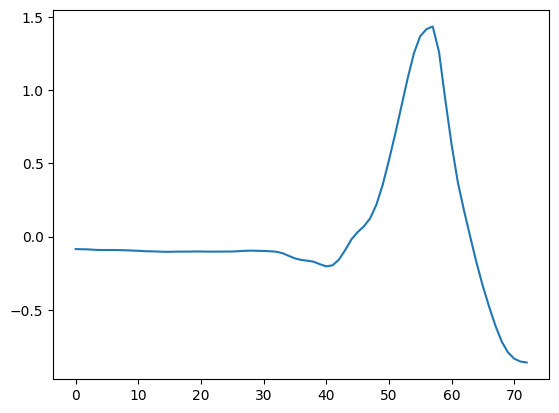

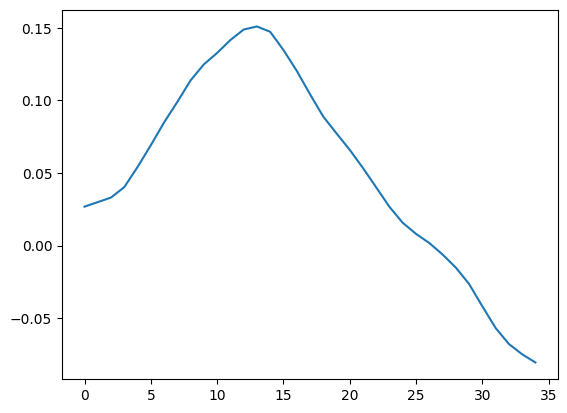

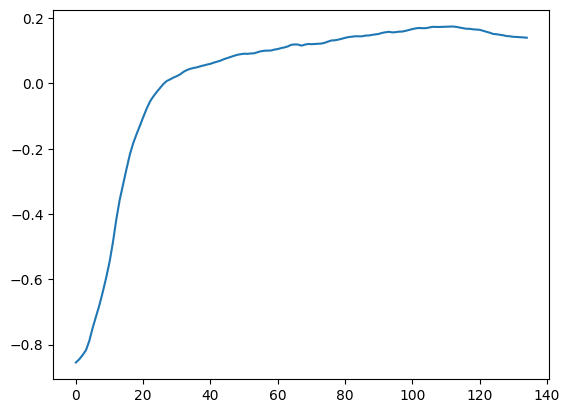

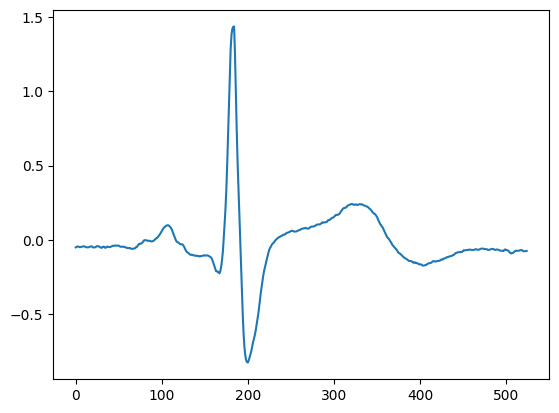

In [173]:
number= 9
plt.plot(test_qrs[0][number])
plt.show()
plt.plot(test_pq[0][number])
plt.show()
plt.plot(test_st[0][number])
plt.show()
plt.plot(test_hb[0][number])

In [136]:
'S2'<='S10'

False

In [122]:
len(train_st)

3

In [133]:
train_st[3].shape

IndexError: list index out of range